In [522]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import random
import matplotlib.pyplot as plt

In [523]:


# Specify the URL
url = 'https://www.mrao.cam.ac.uk/surveys/snrs/snrs.data.html'

# Fetch the content from the URL
response = requests.get(url, verify=False)
content = response.content

# Parse the content with BeautifulSoup
soup = BeautifulSoup(content, 'html.parser')

pre_tag = soup.find('pre')

pre_contents = pre_tag.text

/Users/dmitryzenko/miniconda3/envs/cm21fast/lib/python3.11/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.mrao.cam.ac.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [524]:
lines = pre_contents.strip().split("\n")
lines = [element for element in lines if element]
lines_val = lines[4:-1]

In [525]:
print(lines_val[0])

   0.0  +0.0  17 45 44  -29 00  3.5x2.5  S     100?     0.8?     Sgr A East


In [526]:
dist_max = 10185.42355352
dist_min = 9132.09022019

box_len = 2000

theta_max = np.arctan((box_len/2)/dist_max)
theta_min = np.arctan((box_len/2)/dist_min)

angle_max = 2 * (theta_max*180/np.pi)
angle_min = 2 * (theta_min*180/np.pi)

print(angle_min)
print(angle_max)

12.498431001065951
11.214603133830998


In [527]:
snr_in_5x5 = 1.5

snr_in_angle = int(np.round((snr_in_5x5/25)*angle_max**2))
snr_in_angle

8

In [528]:
grid = 2000

canvas = np.zeros((grid, grid))

random_points = [(random.randint(0, grid-1), random.randint(0, grid-1)) for _ in range(snr_in_angle)]
random_points

[(266, 784),
 (1497, 1654),
 (543, 1852),
 (397, 1830),
 (437, 1888),
 (338, 1063),
 (479, 1065),
 (971, 1109)]

In [529]:
amnt_of_samples = len(lines_val) # amount of specimen
amnt_of_samples

303

In [530]:
sample_idx = [random.randint(0, 302) for _ in range(snr_in_angle)]
sample_idx

[56, 174, 112, 89, 250, 278, 60, 58]

In [531]:
a_values_list = []
b_values_list = []
flux_values_list = []
spectral_idx = []

for i in sample_idx:

    test_line = lines_val[i]
    print(test_line)
    '''if '?' in test_line:
        test_line = test_line.replace('?','')'''
    


    columns = re.split(r' {2,}| (?=[+ - S F C])', test_line)
    if columns[0]=='':
            columns.remove(columns[0])
    if columns[5]=='?':
            columns[5] = 'S'

    columns = [s.replace('?', '') for s in columns]
    print(columns)

    ang_size = columns[4] 
    flux = columns[6]
    spctrl_idx = columns[7]
    
    if spctrl_idx.strip() == '' or spctrl_idx.strip() == 'varies':
            spctrl_idx = 0.5 # random value, can be substituted by mean/mode value from the column

    if '>' in flux:
        flux = flux.replace('>','')
    if flux.strip() == '':
            flux = 7 # random value, can be substituted by mean/mode value from the column
    
    

    if 'x' in ang_size:
        a = float(ang_size.split('x')[0])
        b = float(ang_size.split('x')[1])
    else:
        r = float(ang_size)
        a = r
        b = r

    a_values_list.append(a/2)
    b_values_list.append(b/2)
    flux_values_list.append(float(flux))
    spectral_idx.append(float(spctrl_idx))

  17.8  -2.6  18 32 50  -14 39    24     S       5      0.5
['17.8', '-2.6', '18 32 50', '-14 39', '24', 'S', '5', '0.5']
 206.9  +2.3  06 48 40  +06 26   60x40   S?      6      0.5      PKS 0646+06
[' 206.9', '+2.3', '06 48 40', '+06 26', '60x40', 'S', '6', '0.5', 'PKS 0646+06']
  55.0  +0.3  19 32 00  +19 50   20x15?  S       0.5?   0.5?
['55.0', '+0.3', '19 32 00', '+19 50', '20x15', 'S', '0.5', '0.5']
  33.2  -0.6  18 53 50  -00 02    18     S       3.5    varies
['33.2', '-0.6', '18 53 50', '-00 02', '18', 'S', '3.5', 'varies']
 337.3  +1.0  16 32 39  -46 36   15x12   S      16      0.55     Kes 40
[' 337.3', '+1.0', '16 32 39', '-46 36', '15x12', 'S', '16', '0.55', 'Kes 40']
 351.0  -5.4  17 46 00  -39 25    30     S       ?      ?
[' 351.0', '-5.4', '17 46 00', '-39 25', '30', 'S', '', '']
  18.9  -1.1  18 29 50  -12 58    33     C?     37      0.39
['18.9', '-1.1', '18 29 50', '-12 58', '33', 'C', '37', '0.39']
  18.6  -0.2  18 25 55  -12 50     6     S       1.4    0.4
['18.6'

In [532]:
print(a_values_list)
print(b_values_list)
print(flux_values_list)
print(spectral_idx)

[12.0, 30.0, 10.0, 9.0, 7.5, 15.0, 16.5, 3.0]
[12.0, 20.0, 7.5, 9.0, 6.0, 15.0, 16.5, 3.0]
[5.0, 6.0, 0.5, 3.5, 16.0, 7.0, 37.0, 1.4]
[0.5, 0.5, 0.5, 0.5, 0.55, 0.5, 0.39, 0.4]


In [533]:
nu_ref = float(1000) # 1 GHz to MHz
freq = 157.78 # MHz

spctrl_idx_array = np.array(spectral_idx, dtype=float)
flux_values_list_array = np.array(flux_values_list, dtype=float)

F_at_freq = flux_values_list_array*((freq/nu_ref)**spctrl_idx_array)
#F_at_freq = flux_values_list_array/((nu_ref/freq)**spctrl_idx_array)

print(spctrl_idx_array)
print(flux_values_list_array)
print(F_at_freq)

[0.5  0.5  0.5  0.5  0.55 0.5  0.39 0.4 ]
[ 5.   6.   0.5  3.5 16.   7.  37.   1.4]
[ 1.98607653  2.38329184  0.19860765  1.39025357  5.79493483  2.78050715
 18.00702573  0.66888093]


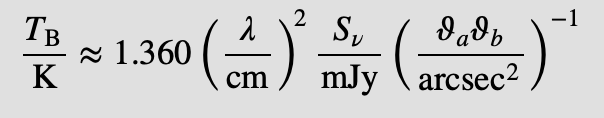

https://www.atnf.csiro.au/people/Tobias.Westmeier/tools_hihelpers.php

In [534]:
def flux_to_brghtnss_temp(freq, flux):

    freq_hz = freq * 10**6 # Hz
    c0 = 299792458 # m/s
    flux_mJy = flux * 10**3 # mJy
    Theta = 3 * 60 # arcsec, FoV of the instrument not from the BOX_LEN!!!
    #Theta = 12 * 60 * 60


    lmbda = (c0/freq_hz) * 10**2 # cm
    S_nu = flux_mJy

    #print(lmbda)

    T = 1.360 * lmbda**2 * S_nu * (Theta**2)**(-1) # in K


    return T


def flux_to_brghtnss_temp_Emma(freq, flux):

    c0 = 299792458 # m/s
    k_b = 1.38e-23
    FWHM_arcmin = 3.0
    FWHM = (FWHM_arcmin/60.0)*(np.pi/180.0)
    beamarea = np.pi * FWHM**2 / (4.0*np.log(2)) # beam solid angle of Gaussian beam

    T = flux *1e-26*(c0/(freq*1.0e6))**2*(1.0/(2.0*k_b*beamarea))


    return T

In [535]:
T = flux_to_brghtnss_temp_Emma(freq, F_at_freq)
print(T)

[ 3010.68442848  3612.82131417   301.06844285  2107.47909994
  8784.51547572  4214.95819987 27296.76880362  1013.95357907]


In [536]:
T = flux_to_brghtnss_temp(freq, F_at_freq)
print(T)

[ 3009.72891592  3611.6746991    300.97289159  2106.81024114
  8781.72750007  4213.62048228 27288.10552253  1013.6317767 ]


In [537]:
'''def draw_multiple_ellipses_on_grid(coordinates, a_values, b_values, angle_max, grid_size):

    canvas_angular_size_arcminutes = angle_max * 60

    # Scale factor: number of pixels per arcminute
    scale_factor = grid_size / canvas_angular_size_arcminutes

    grid = np.zeros((grid_size, grid_size))

    for (center_x, center_y), a, b in zip(coordinates, a_values, b_values):
        # Convert ellipse dimensions to grid units
        semi_major_axis_pixels = int(round(a * scale_factor))
        semi_minor_axis_pixels = int(round(b * scale_factor))

        # Calculate the range for the ellipse in both x and y directions
        x_range = np.arange(center_x - semi_minor_axis_pixels, center_x + semi_minor_axis_pixels + 1)
        y_range = np.arange(center_y - semi_major_axis_pixels, center_y + semi_major_axis_pixels + 1)

        # Ensure the ranges are within the grid boundaries
        x_range = x_range[(x_range >= 0) & (x_range < grid_size)]
        y_range = y_range[(y_range >= 0) & (y_range < grid_size)]

        # Fill pixels within the ellipse
        for x_pixel in x_range:
            for y_pixel in y_range:
                if ((x_pixel - center_x)**2 / semi_minor_axis_pixels**2 + 
                    (y_pixel - center_y)**2 / semi_major_axis_pixels**2) <= 1:
                    grid[y_pixel, x_pixel] = 1

    return grid

# Example usage with a list of coordinates and corresponding dimensions
coordinates_list = random_points


# Draw the ellipses
multiple_ellipse_grid = draw_multiple_ellipses_on_grid(random_points, a_values_list, b_values_list, angle_max, grid)


# Plotting
plt.imshow(multiple_ellipse_grid, cmap='gray')
plt.colorbar()
plt.show()'''

"def draw_multiple_ellipses_on_grid(coordinates, a_values, b_values, angle_max, grid_size):\n\n    canvas_angular_size_arcminutes = angle_max * 60\n\n    # Scale factor: number of pixels per arcminute\n    scale_factor = grid_size / canvas_angular_size_arcminutes\n\n    grid = np.zeros((grid_size, grid_size))\n\n    for (center_x, center_y), a, b in zip(coordinates, a_values, b_values):\n        # Convert ellipse dimensions to grid units\n        semi_major_axis_pixels = int(round(a * scale_factor))\n        semi_minor_axis_pixels = int(round(b * scale_factor))\n\n        # Calculate the range for the ellipse in both x and y directions\n        x_range = np.arange(center_x - semi_minor_axis_pixels, center_x + semi_minor_axis_pixels + 1)\n        y_range = np.arange(center_y - semi_major_axis_pixels, center_y + semi_major_axis_pixels + 1)\n\n        # Ensure the ranges are within the grid boundaries\n        x_range = x_range[(x_range >= 0) & (x_range < grid_size)]\n        y_range = y_